In [2]:
import pandas as pd
from tqdm import tqdm_notebook
%matplotlib inline

## Intent classification

### Imports

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import ParameterGrid
# from pymystem3 import Mystem

In [4]:
macro_f1_score = make_scorer(f1_score, average='macro')
# mystem = Mystem(entire_input=False)
# mystem.start()

# def lematize(text):
#     return ' '.join(mystem.lemmatize(text))

### Data

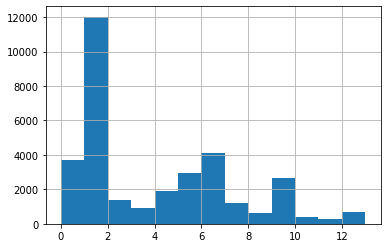

In [5]:
train = pd.read_csv('../data/intent_train.csv')
label_map = {label:i for i, label in enumerate(train['label'].unique())}
train['label'].map(label_map).hist(bins=13)

X = train['text'].fillna('none').str.lower()
# X = X.apply(lematize)
y = train['label'].map(label_map)

### Model

In [6]:
def generate_model(params):
    tfidf = TfidfVectorizer(
        analyzer=params['analyzer'], 
        ngram_range=(params['range_min'], params['range_max']),
        min_df=params['min_df'],
        max_features=params['max_features'],
    )
    lr = LogisticRegression(
        C = params['C'],
        multi_class='auto',
        solver='liblinear',
        class_weight='balanced',
        random_state=42,
        n_jobs=1,
    )
    return Pipeline([('tfidf', tfidf), ('lr', lr)])

### Find best params

In [7]:
grid_params = {
    'analyzer': ['char_wb'],
    'range_min': [3, 4],
    'range_max': [4, 5, 6],
    'min_df': range(5, 8),
    'max_features': [1500, 2000, 3000],
    'C': [1, 10],
}
N_FOLDS = 3
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
all_results = []
best_param = {}
best_score = 0
for param in tqdm_notebook(list(ParameterGrid(grid_params))):
    model = generate_model(param)
    score = cross_val_score(model, X, y, cv=cv, scoring=macro_f1_score, n_jobs=1).mean()
    all_results.append({'param':param, 'score':score})
    
    now_best = max(all_results, key = lambda x: x['score'])
    if best_score < now_best['score']:
        best_param = now_best['param']
        best_score = now_best['score']
        print(f"BEST PARAMS {best_param}")
        print(f"BEST SCORE {best_score}")

/Users/kirilltusin/.local/share/virtualenvs/DataScience-GrVxlVPs/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 1500, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.6931196021086841
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 1500, 'min_df': 5, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.6992851484458957
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 2000, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.708532588738338
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 2000, 'min_df': 5, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.7182745603250374
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 2000, 'min_df': 6, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.7183074479216031
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 3000, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.7228845787388325
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 3000, 'min_df': 5, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.7295093634891061
BEST PARAMS {'

In [8]:
best_param, best_score

({'C': 10,
  'analyzer': 'char_wb',
  'max_features': 3000,
  'min_df': 5,
  'range_max': 4,
  'range_min': 4},
 0.7472822927960888)

In [10]:
grid_params = {
    'analyzer': ['char_wb'],
    'range_min': [3, 4],
    'range_max': [4, 5, 6],
    'min_df': range(5, 8),
    'max_features': [5000, 7500, 10000],
    'C': [1, 10],
}
N_FOLDS = 3
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
all_results = []
best_param = {}
best_score = 0
for param in tqdm_notebook(list(ParameterGrid(grid_params))):
    model = generate_model(param)
    score = cross_val_score(model, X, y, cv=cv, scoring=macro_f1_score, n_jobs=1).mean()
    all_results.append({'param':param, 'score':score})
    
    now_best = max(all_results, key = lambda x: x['score'])
    if best_score < now_best['score']:
        best_param = now_best['param']
        best_score = now_best['score']
        print(f"BEST PARAMS {best_param}")
        print(f"BEST SCORE {best_score}")

/Users/kirilltusin/.local/share/virtualenvs/DataScience-GrVxlVPs/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 5000, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.7333157497730335
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 5000, 'min_df': 5, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.7404586000794587
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 7500, 'min_df': 5, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.7405718897778643
BEST PARAMS {'C': 1, 'analyzer': 'char_wb', 'max_features': 10000, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.7414298826102049
BEST PARAMS {'C': 10, 'analyzer': 'char_wb', 'max_features': 5000, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.7571474958511871
BEST PARAMS {'C': 10, 'analyzer': 'char_wb', 'max_features': 5000, 'min_df': 5, 'range_max': 4, 'range_min': 4}
BEST SCORE 0.7585485363575764
BEST PARAMS {'C': 10, 'analyzer': 'char_wb', 'max_features': 7500, 'min_df': 5, 'range_max': 4, 'range_min': 3}
BEST SCORE 0.7620171014442544



In [11]:
best_param, best_score

({'C': 10,
  'analyzer': 'char_wb',
  'max_features': 7500,
  'min_df': 5,
  'range_max': 4,
  'range_min': 3},
 0.7620171014442544)